# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [3]:
import numpy
from keras.datasets import cifar100,cifar10
import numpy as np
np.random.seed(100)

# 資料準備

In [6]:
(x_10_train, y_10_train),(x_10_test, y_10_test) = cifar10.load_data()
(x_100_train, y_100_train),(x_100_test, y_100_test) = cifar100.load_data(label_mode= 'fine')
print('Cifar10 train:',len(x_10_train),x_10_train.shape)
print('Cifar10 test:',len(x_10_test),x_10_test.shape)
print('Cifar100 train:',len(x_100_train),x_100_train.shape)
print('Cifar100 test:',len(x_100_test),x_100_test.shape)

Cifar10 train: 50000 (50000, 32, 32, 3)
Cifar10 test: 10000 (10000, 32, 32, 3)
Cifar100 train: 50000 (50000, 32, 32, 3)
Cifar100 test: 10000 (10000, 32, 32, 3)


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

def plot_images_labels_pred(images, labels, pred, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num> 25:
        num=25
    for i in range(0, num):
        ax= plt.subplot(5,5,i+1)
        ax.imshow(images[idx], cmap='binary')
        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(pred)>0:
            title+='=>'+label_dict[pred[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

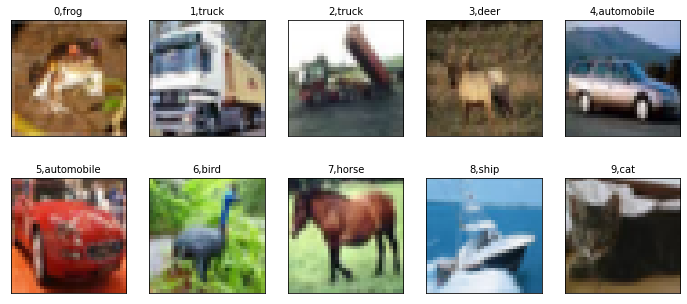

In [13]:
plot_images_labels_pred(x_10_train,y_10_train,[],0)

# Image normalize 

In [14]:
x_10_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [15]:
x_10_train_normalize= x_10_train.astype('float32')/255.0
x_10_test_normalize= x_10_test.astype('float32')/255.0 

In [16]:
x_10_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [17]:
y_10_train.shape

(50000, 1)

In [18]:
y_10_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
from keras.utils import np_utils
y_10_train_OneHot= np_utils.to_categorical(y_10_train)
y_10_test_OneHot= np_utils.to_categorical(y_10_test)

In [20]:
print(y_10_train_OneHot.shape)
print(y_10_test_OneHot.shape)

(50000, 10)
(10000, 10)


In [21]:
y_10_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Cifar100

In [31]:
x_100_train_normalize= x_100_train.astype('float32')/255.0
x_100_test_normalize= x_100_test.astype('float32')/255.0
x_100_train_normalize[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7647059 , 0.8039216 , 0.75686276],
        [0.83137256, 0.8784314 , 0.8       ],
        [0.7137255 , 0.7607843 , 0.654902  ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6666667 , 0.6901961 , 0.5882353 ],
        [0.6313726 , 0.65882355, 0.50980395],
        [0.57254905, 0.6039216 , 0.44313726]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.7411765 , 0.78039217, 0.6627451 ],
        [0.6509804 , 0.69803923, 0.50980395],
        [0.4745098 , 0.52156866, 0.34117648]],

       ...,

       [[0.5803922 , 0.7254902 , 0.30980393],
        [0.5568628 , 0.7137255 , 0.22352941],
        [0.54901963, 0

In [32]:
y_100_train_OneHot= np_utils.to_categorical(y_100_train)
y_100_test_OneHot= np_utils.to_categorical(y_100_test)
print('OneHotEncoding前:',y_100_train.shape)
print('OneHotEncoding後:',y_100_train_OneHot.shape)

OneHotEncoding前: (50000, 1)
OneHotEncoding後: (50000, 100)


In [33]:
y_10_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25: num=25 

    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

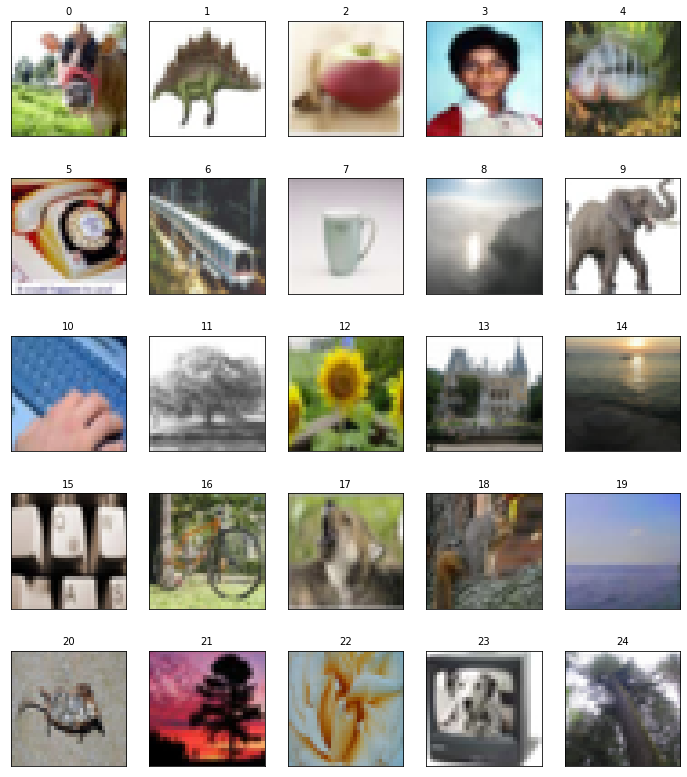

In [40]:
plot_images_labels_prediction(x_100_train,y_100_train,[],0)